# Bagging Exercises

## Introduction

We will be using the customer churn data from the telecom industry that we used in week 1 for this week's exercises. The data file is called `Orange_Telecom_Churn_Data.csv`. 

### Prerequisites
Install imblearn and upgrade sklearn to 0.19.0

In [30]:
#!pip install imblearn
#!pip install --upgrade sklearn

In [55]:
from __future__ import print_function
import os
data_path = ['data']

## Question 1

* Import the customer churn data, which is found in the file `Orange_Telecom_Churn_Data.csv`. 
* Remove any columns that are likely not to be used for prediction.
* Encode data types as appropriate.

In [141]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [142]:
data.head().T

,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account_length,128,107,137,84,75
area_code,415,415,415,408,415
phone_number,382-4657,371-7191,358-1921,375-9999,330-6626
intl_plan,no,no,no,yes,yes
voice_mail_plan,yes,yes,no,no,no
number_vmail_messages,25,26,0,0,0
total_day_minutes,265.1,161.6,243.4,299.4,166.7
total_day_calls,110,123,114,71,113
total_day_charge,45.07,27.47,41.38,50.9,28.34


The prediction should definitely not include phone number. And it is unlikely that area code or state would be desired, unless there is some reason to assume the model has a very specific geographic factor.

In [143]:
# add anonminity
#data.drop(['state', 'phone_number', 'area_code'], axis=1, inplace=True)
data.drop(['state', 'phone_number'], axis=1, inplace=True)

Examine the data types. Everything looks OK other than `int_plan` and `voice_mail_plan` need to be boolean encoded.

In [144]:
data.dtypes

account_length                     int64
area_code                          int64
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [145]:
# speedup  string -> bool   
from sklearn.preprocessing import LabelEncoder

for col in ['intl_plan', 'voice_mail_plan']:
    data[col] = data[col].replace('yes','True').replace('no','False').astype(np.bool)


#data['percode'] = data['churned'].replace('True',1).replace('False',0).astype(int)
data['percode'] = data['area_code'].combine(data['churned'], lambda a,c: c * 1000 + a )
print(data['percode'].dtype)

data[['intl_plan', 'voice_mail_plan', 'percode']].dtypes

int64


intl_plan           bool
voice_mail_plan     bool
percode            int64
dtype: object

In [146]:
#data['percode']

## Question 2

* Examine distribution of the predicted variable (`churned`).
* Split the data into train and test sets. Decide if a stratified split should be used or not based on the distribution.
* Examine the distribution of the predictor variable in the train and test data.

In [147]:
# Data are skewed at ~85% towards non-churned customers
# This will be important to remember when model building

data.churned.value_counts()
data.percode.value_counts()

415     2149
408     1082
510     1062
1415     346
1510     184
1408     177
Name: percode, dtype: int64

In [130]:
data.churned.value_counts(normalize=True)
data.percode.value_counts(normalize=True)

415     0.4298
408     0.2164
510     0.2124
1415    0.0692
1510    0.0368
1408    0.0354
Name: percode, dtype: float64

In [131]:
data

,account_length,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,nc,percode
0,128,415,True,True,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,False,False,415
1,107,415,True,True,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,False,False,415
2,137,415,True,True,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,False,False,415
3,84,408,True,True,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,False,408
4,75,415,True,True,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,False,False,415
5,118,510,True,True,0,223.4,98,37.98,220.6,101,...,203.9,118,9.18,6.3,6,1.70,0,False,False,510
6,121,510,True,True,24,218.2,88,37.09,348.5,108,...,212.6,118,9.57,7.5,7,2.03,3,False,False,510
7,147,415,True,True,0,157.0,79,26.69,103.1,94,...,211.8,96,9.53,7.1,6,1.92,0,False,False,415
8,117,408,True,True,0,184.5,97,31.37,351.6,80,...,215.8,90,9.71,8.7,4,2.35,1,False,False,408
9,141,415,True,True,37,258.6,84,43.96,222.0,111,...,326.4,97,14.69,11.2,5,3.02,0,False,False,415


Given the skew in the predictor variable, let's split the data with the *churned* values being stratified.

In [152]:
from sklearn.model_selection import StratifiedShuffleSplit


feature_cols = [x for x in data.columns if x != 'churned' and x != 'area_code' and x != 'percode']


# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

# Get the index values from the generator
train_cidx, test_cidx = next(strat_shuff_split.split(data[feature_cols], data['churned']))
train_aidx, test_aidx = next(strat_shuff_split.split(data[feature_cols], data['area_code']))
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['percode']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'percode']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'percode']

# Create the data sets
Xc_train = data.loc[train_cidx, feature_cols]
yc_train = data.loc[train_cidx, 'churned']

Xc_test = data.loc[test_cidx, feature_cols]
yc_test = data.loc[test_cidx, 'churned']

# Create the data sets
Xa_train = data.loc[train_aidx, feature_cols]
ya_train = data.loc[train_aidx, 'area_code']

Xa_test = data.loc[test_aidx, feature_cols]
ya_test = data.loc[test_aidx, 'area_code']

In [153]:
print(y_train.value_counts(normalize=False))
print(ya_train.value_counts(normalize=False))

415     1504
408      757
510      744
1415     242
1510     129
1408     124
Name: percode, dtype: int64
415    1747
408     881
510     872
Name: area_code, dtype: int64


In [154]:
print(y_test.value_counts(normalize=True))
print(ya_test.value_counts(normalize=True))

415     0.430000
408     0.216667
510     0.212000
1415    0.069333
1510    0.036667
1408    0.035333
Name: percode, dtype: float64
415    0.498667
408    0.252000
510    0.249333
Name: area_code, dtype: float64


In [173]:
y_train.unique() #head()

array([1415,  510,  408,  415, 1510, 1408])

## Question 3

* Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.
* Plot the resulting oob errors as a function of the number of trees.

*Hint:* since the only thing changing is the number of trees, the `warm_start` flag can be used so that the model just adds more trees to the existing model each time. Use the `set_params` method to update the number of trees.

In [156]:
# Suppress warnings about too few trees from the early models

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [174]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.648286
20.0,0.641143
30.0,0.618000
40.0,0.608000
50.0,0.602000
100.0,0.576571
150.0,0.573714
200.0,0.572286
300.0,0.567714


The error looks like it has stabilized around 100-150 trees.

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

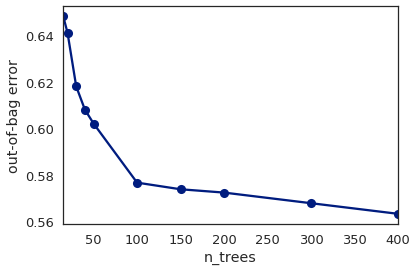

In [176]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

## Question 4

* Repeat question 3 using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.
* Compare the out-of-bag errors for the two different types of models.

In [177]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.650286
20.0,0.638286
30.0,0.624857
40.0,0.611143
50.0,0.598857
100.0,0.574000
150.0,0.570571
200.0,0.559429
300.0,0.557143


Combine the two dataframes into a single one for easier plotting.

In [178]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.648286,0.650286
20.0,0.641143,0.638286
30.0,0.618000,0.624857
40.0,0.608000,0.611143
50.0,0.602000,0.598857
100.0,0.576571,0.574000
150.0,0.573714,0.570571
200.0,0.572286,0.559429
300.0,0.567714,0.557143


The random forest model performs consistently better than the extra randomized trees.

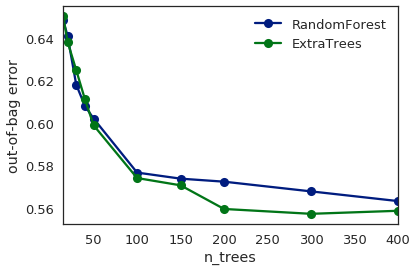

In [179]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = oob_df.plot(marker='o')
ax.set(ylabel='out-of-bag error');

## Question 5

* Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set. 
* Given the distribution of the predicted class, which metric is most important? Which could be deceiving?

In [180]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

Unsurprisingly, recall is rather poor for the customers who churned (True) class since they are quite small. We are doing better than random guessing, though, as the accuracy is 0.932 (vs 0.85 for random guessing).

In [181]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         #'precision': precision_score(y_test, y_pred, average='samples'),
                         #'recall': recall_score(y_test, y_pred, average='samples'),
                         #'f1': f1_score(y_test, y_pred, average='samples'),
                         #'auc': roc_auc_score(y_test, y_pred)
                        },
                         index=pd.Index([0]))

print(score_df)

             precision    recall  f1-score   support

        408       0.20      0.05      0.08       325
        415       0.47      0.92      0.62       645
        510       0.27      0.04      0.07       318
       1408       0.11      0.02      0.03        53
       1415       0.42      0.42      0.42       104
       1510       0.10      0.02      0.03        55

avg / total       0.34      0.44      0.33      1500

   accuracy
0  0.443333


## Question 6

* Print or visualize the confusion matrix.
* Plot the ROC-AUC and precision-recall curves.
* Plot the feature importances.

Text(0.5,9.9,'Ground Truth')

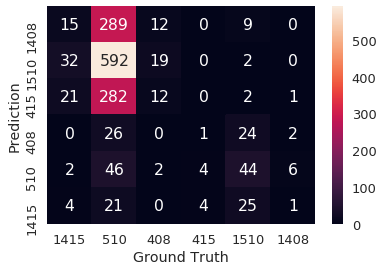

In [183]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

labels = y_train.unique()
ax.set_xticklabels(labels);
ax.set_yticklabels(labels[::-1]);
ax.set_ylabel('Prediction');
ax.set_xlabel('Ground Truth')

In [197]:
model.classes_
model.n_features_
model.n_outputs_
model.oob_decision_function_
model.feature_importances_

array([ 0.07854053,  0.        ,  0.        ,  0.03034574,  0.08631487,
        0.0728087 ,  0.08646549,  0.07319819,  0.07214742,  0.07337325,
        0.07010141,  0.07417922,  0.06845168,  0.06247933,  0.04688234,
        0.06210722,  0.04260461])

The ROC-AUC and precision-recall curves.

ValueError: multiclass format is not supported

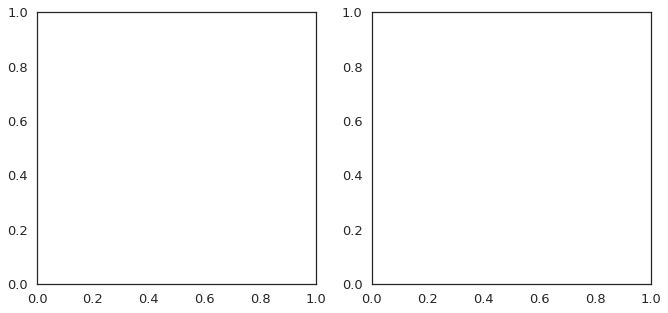

In [184]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(11, 5)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

The feature importances. Total daily cost is the biggest predictor of customer churn.

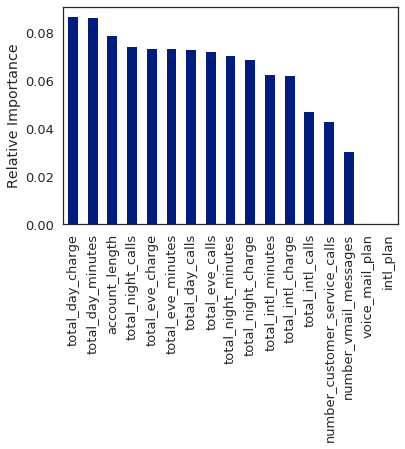

In [202]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

### Churn data has lot of class imbalance. 
To fix it, use different sampling techniques like SMOTE, RamdomOverSampling .
Refer http://contrib.scikit-learn.org/imbalanced-learn/stable/api.html

After fixing class imablance, check the metrics for different techniques.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling as os_smote
from imblearn import under_sampling as us_smote
from imblearn import combine as cs_smote

## Question 7 

Create different objects using multiple smoting methods

Ex: os_sm = os_smote.SMOTE(random_state=45, ratio = 0.6)

#### Re-generate X_train and y_train using SMOTE object

Cross verify the value counts

In [228]:
os_sm = os_smote.SMOTE(random_state=42)
X_samp, y_samp = os_sm.fit_sample(data[feature_cols], data['percode'])

#us_sm = us_smote.SMOTE(random_state=42)
#Xu_samp, yu_samp = os_sm.fit_sample(data[feature_cols], data['percode'])

#cs_sm = cs_smote.SMOTE(random_state=42)
#Xc_samp, yc_samp = os_sm.fit_sample(data[feature_cols], data['percode'])


train_idx, test_idx = next(strat_shuff_split.split(X_samp, y_samp))
#train_sidx, test_sidx = next(strat_shuff_split.split(Xs_samp, ys_samp))
#train_cidx, test_cidx = next(strat_shuff_split.split(Xc_samp, yc_samp))

In [229]:
# Split the data into two parts with 1500 points in the test data
# This creates a generator
#strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

# Get the index values from the generator
#train_idx, test_idx = next(strat_shuff_split.split(X_samp, y_samp))

# Create the data sets
X_train = X_samp[train_idx]
y_train = y_samp[train_idx]

X_test = X_samp[test_idx]
y_test = y_samp[test_idx]


In [230]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.328770
20.0,0.303581
30.0,0.277339
40.0,0.256275
50.0,0.244778
100.0,0.218536
150.0,0.205020
200.0,0.199842
300.0,0.198613


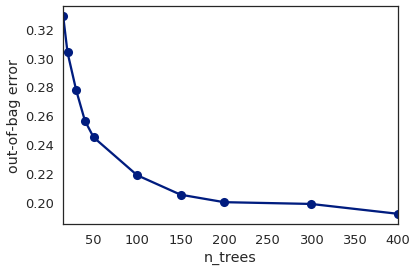

In [231]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

## Question 8

* Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.
* Plot the resulting oob errors as a function of the number of trees.

*Hint:* since the only thing changing is the number of trees, the `warm_start` flag can be used so that the model just adds more trees to the existing model each time. Use the `set_params` method to update the number of trees.

*Note:* Use re-sampled data

The error looks like it has stabilized around 100-150 trees.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

## Question 9

* Repeat question 3 using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.
* Compare the out-of-bag errors for the two different types of models.

Combine the two dataframes into a single one for easier plotting.

The random forest model performs consistently better than the extra randomized trees.

## Question 10

* Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set. 
* Given the distribution of the predicted class, which metric is most important? Which could be deceiving?

Unsurprisingly, recall is rather poor for the customers who churned (True) class since they are quite small. We are doing better than random guessing, though, as the accuracy is 0.932 (vs 0.85 for random guessing).

## Question 11

* Print or visualize the confusion matrix.
* Plot the ROC-AUC and precision-recall curves.
* Plot the feature importances.

The ROC-AUC and precision-recall curves.

The feature importances. Total daily cost is the biggest predictor of customer churn.